# Heart Attack Prediction

In [26]:
# importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Read file data

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data preprocessing 1

In [50]:
# shape of dataset

df.shape

(303, 14)

In [28]:
# get info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [29]:
# columns name

df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [30]:
# checking for the missing values

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [31]:
# checking the data types of the columns

df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [32]:
# checking the data descriptions

df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploratory Data Analysis
## and
## Visulaizing the data

In [33]:
# coorelation between the column output and the other columns

df.corr()['output'].sort_values()

exng       -0.436757
oldpeak    -0.430696
caa        -0.391724
thall      -0.344029
sex        -0.280937
age        -0.225439
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slp         0.345877
thalachh    0.421741
cp          0.433798
output      1.000000
Name: output, dtype: float64

<Axes: xlabel='output'>

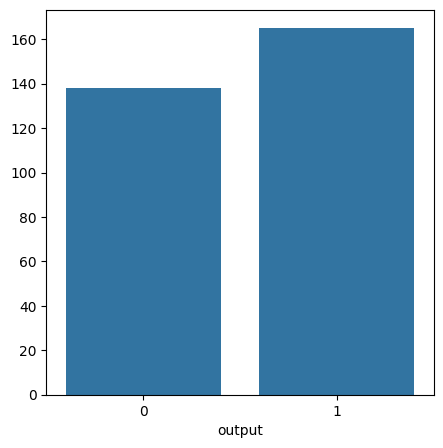

In [34]:
# bar plot for the number of output

plt.figure(figsize=(5,5))
sns.barplot(x=df['output'].value_counts().index , y=df['output'].value_counts().values)

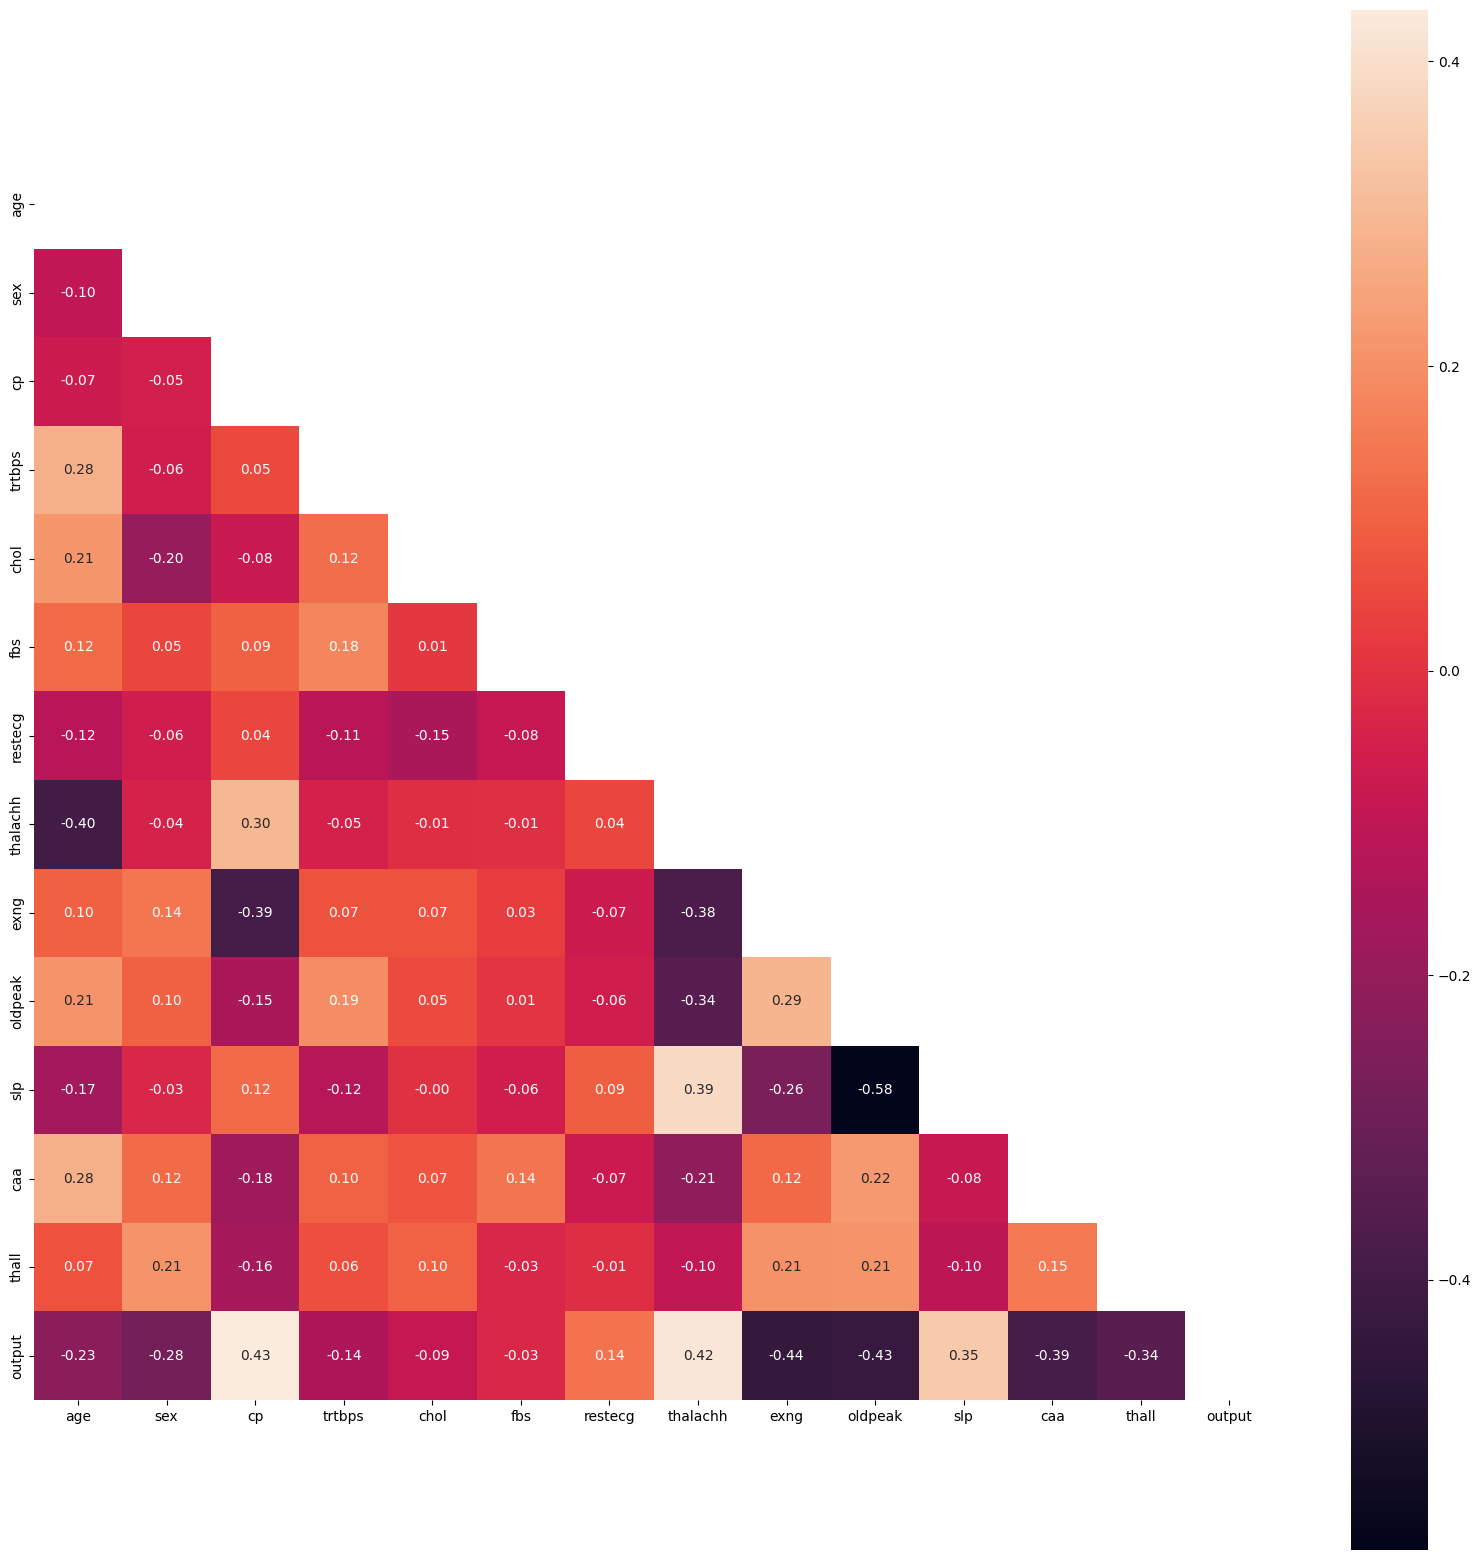

In [35]:
# create a heatmap to check the correlation

plt.figure(figsize=(20,20))
corr = df.corr()
mask = np.triu(corr)

sns.heatmap(corr, square=True, mask=mask, annot=True, fmt='.2f')
plt.show()

<Axes: xlabel='sex', ylabel='count'>

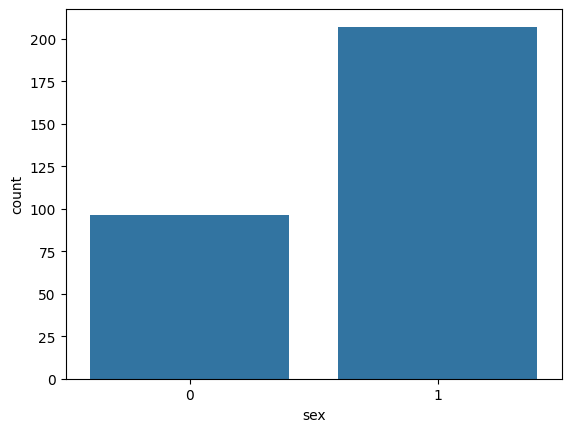

In [51]:
# count of sex

sns.countplot(x='sex' , data=df)

In [52]:
# Dividing the age of people into separate group
# 0 = 0-12 , 1 = 13-19 , 2 = 20-30 , 3 = 31-60 , 4 = 61-100 

df['age'] = pd.cut(x=df['age'], bins=[0, 12, 19, 30, 60, 100], labels=[0, 1, 2, 3,4])
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,4,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,3,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,3,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='age', ylabel='count'>

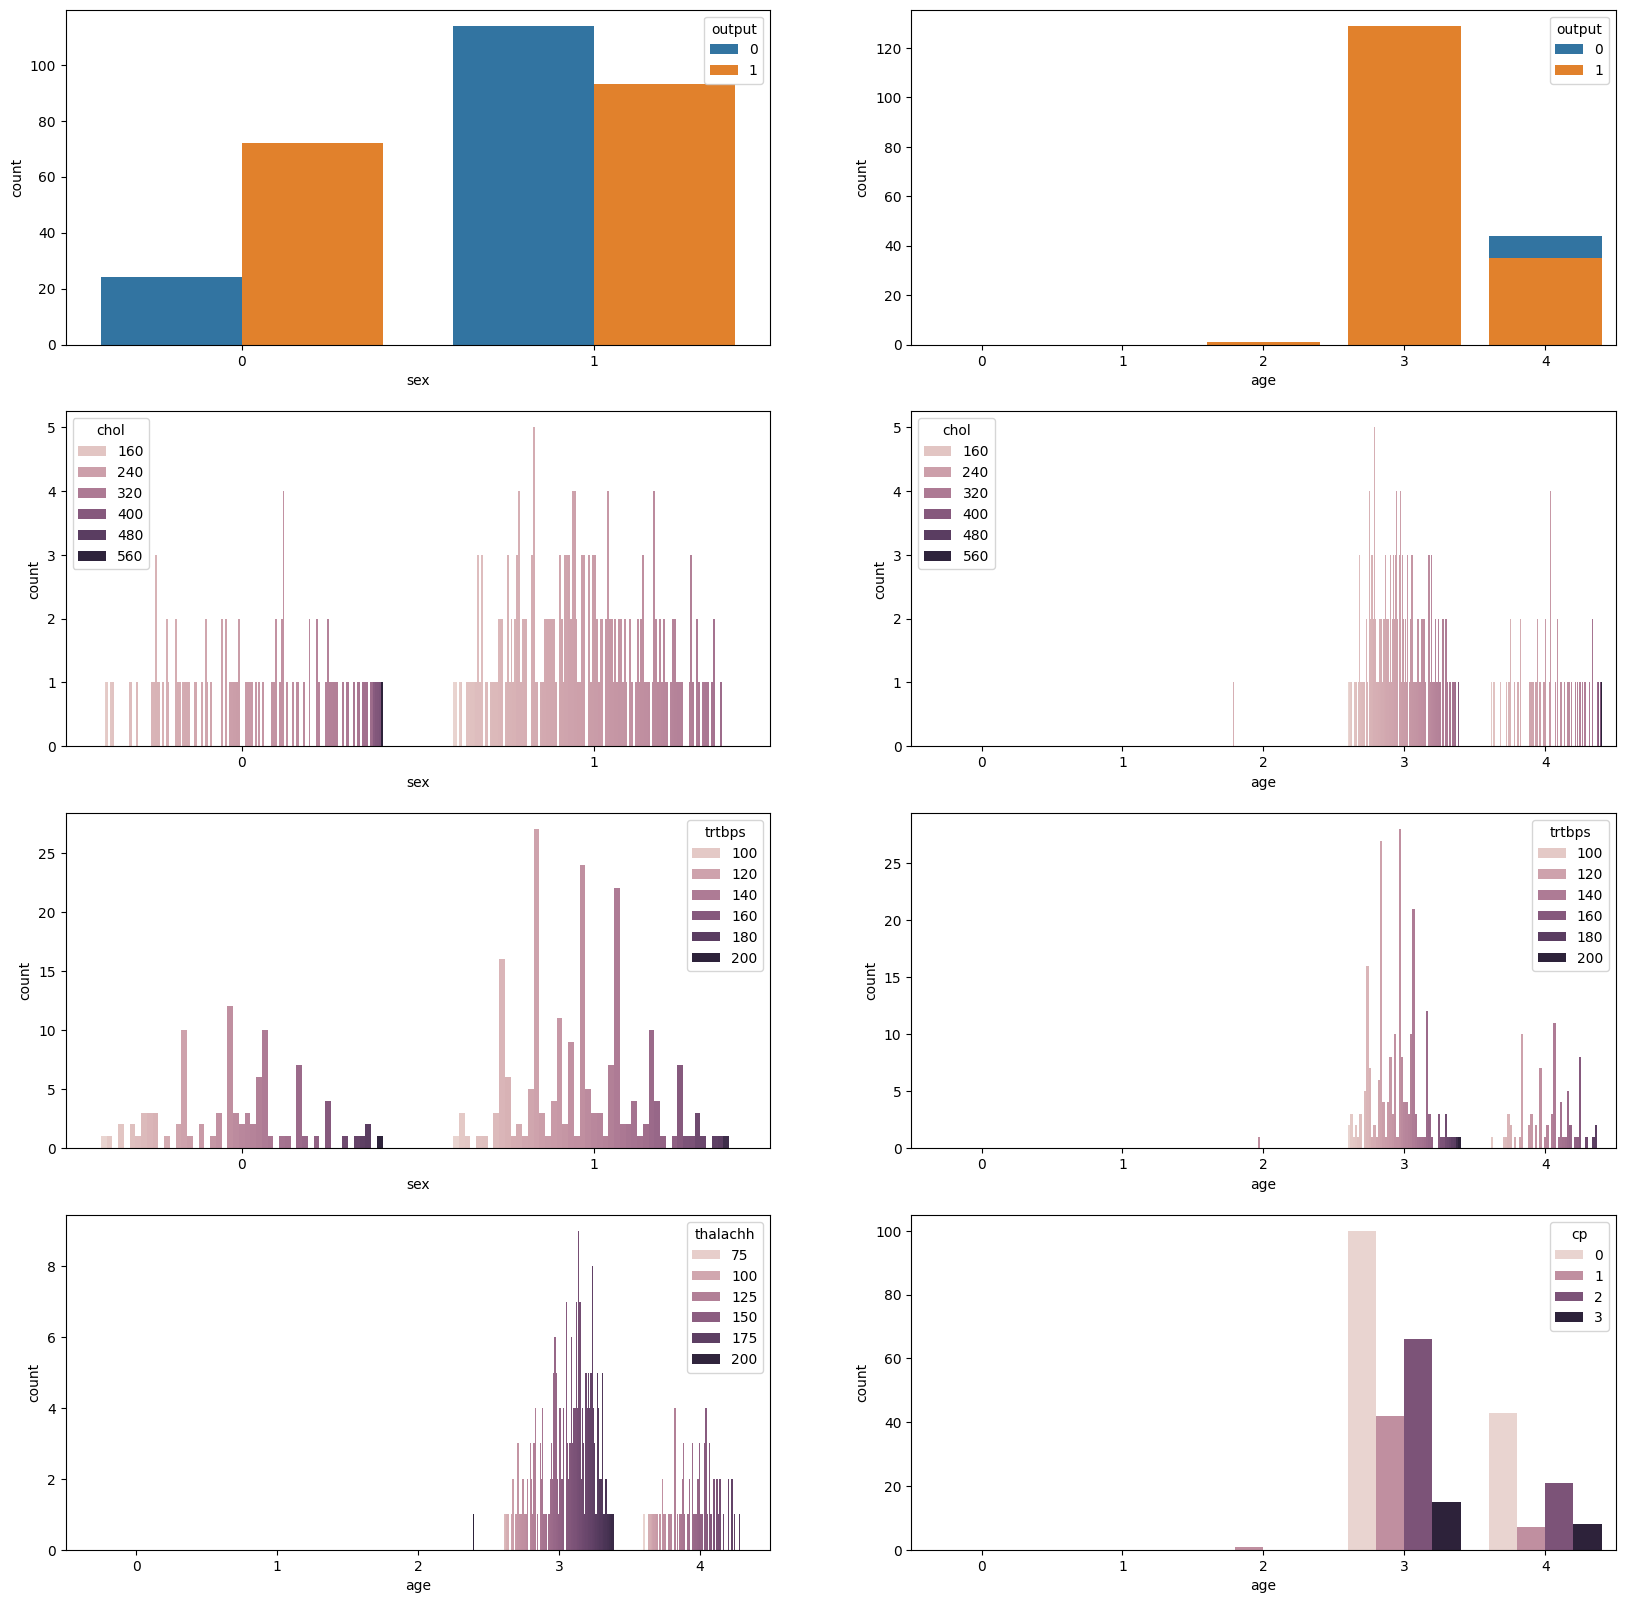

In [56]:
fig, ax = plt.subplots(4,2,figsize=(20, 20))

sns.countplot(x = 'sex', data = df,hue = 'output', ax=ax[0,0])
sns.countplot(x = 'age', data = df,hue = 'output', ax=ax[0,1])

sns.countplot(x = 'sex', data = df,hue = 'chol', ax=ax[1,0])
sns.countplot(x = 'age', data = df,hue = 'chol', ax=ax[1,1])

sns.countplot(x = 'sex', data = df,hue = 'trtbps', ax=ax[2,0])
sns.countplot(x = 'age', data = df,hue = 'trtbps', ax=ax[2,1])

sns.countplot(x = 'age', data = df,hue = 'thalachh', ax=ax[3,0])
sns.countplot(x = 'age', data = df,hue = 'cp', ax=ax[3,1])

## Train Test Split

In [57]:
X = df.drop(['output'], axis=1)
X[0:5]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,4,1,3,145,233,1,0,150,0,2.3,0,0,1
1,3,1,2,130,250,0,1,187,0,3.5,0,0,2
2,3,0,1,130,204,0,0,172,0,1.4,2,0,2
3,3,1,1,120,236,0,1,178,0,0.8,2,0,2
4,3,0,0,120,354,0,1,163,1,0.6,2,0,2


In [58]:
y = df['output']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [59]:
# data normalization

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X[0:5]

array([[ 1.66983066,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-0.57887463,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-0.57887463, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [-0.57887463,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [-0.57887463, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

# Decision Tree Classifier
### create the model

In [61]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# train the model with train data
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Model Evaluation For Decision Tree

In [62]:
# predict output

y_pred = model.predict(X_test)

print(f"Real Values:\n{y_test[0:5]}")             # real value
print()
print(f"Predict Values:\n{y_pred[0:5]}")          # predict value

Real Values:
179    0
228    0
111    1
246    0
60     1
Name: output, dtype: int64

Predict Values:
[0 1 1 0 1]


In [72]:
# accuracy decision tree

from sklearn.metrics import accuracy_score

print(f"Decision Tree accuracy: {accuracy_score(y_test , y_pred)}")

Decision Tree accuracy: 0.8524590163934426


In [64]:
# report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



# Tree graph display

In [65]:
# import libraries
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
from io import StringIO

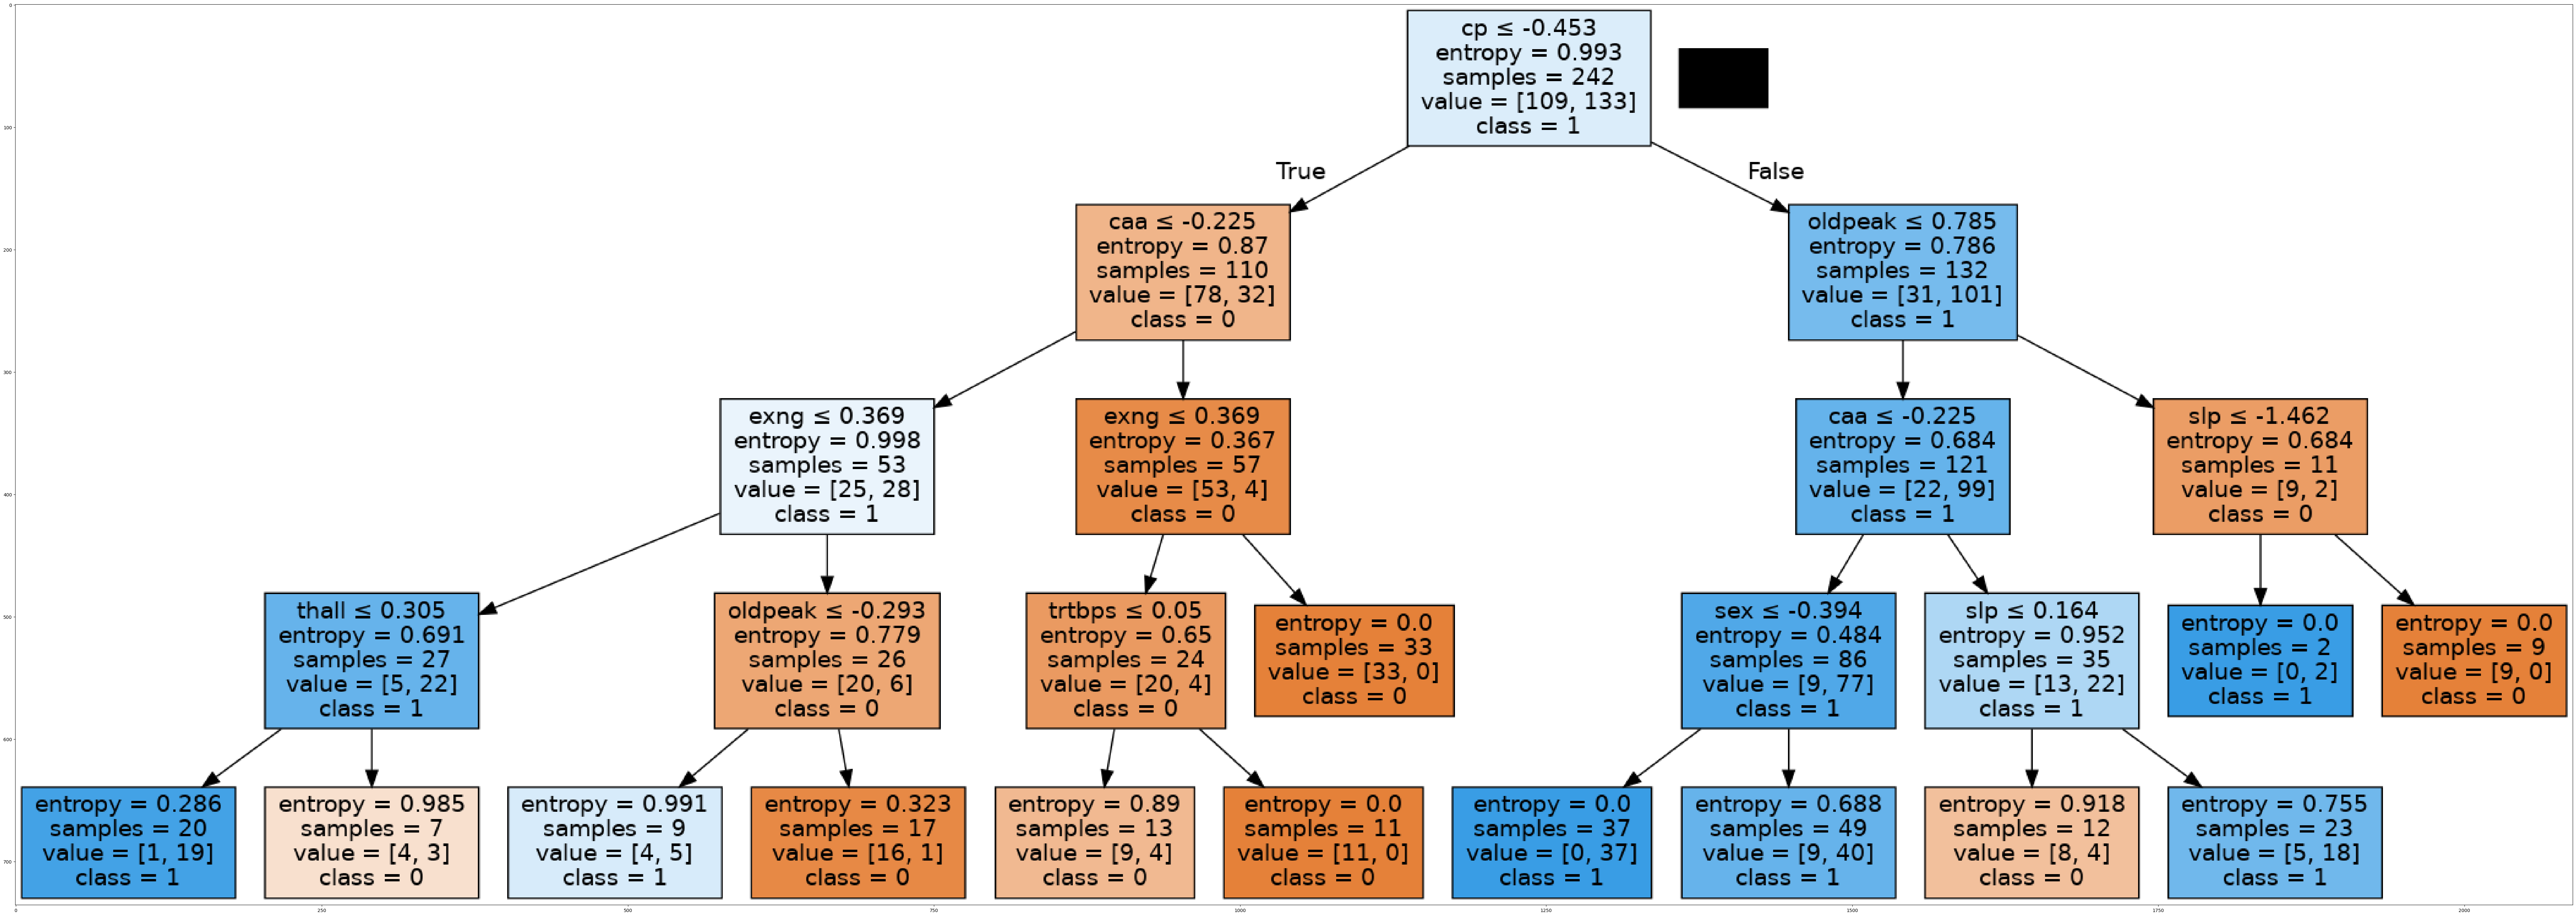

In [66]:

dot_data = StringIO()
filename = "heart_tree.png"
featureNames = df.columns[0:13]

out=tree.export_graphviz(model, feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train).astype('str'), filled=True,  special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

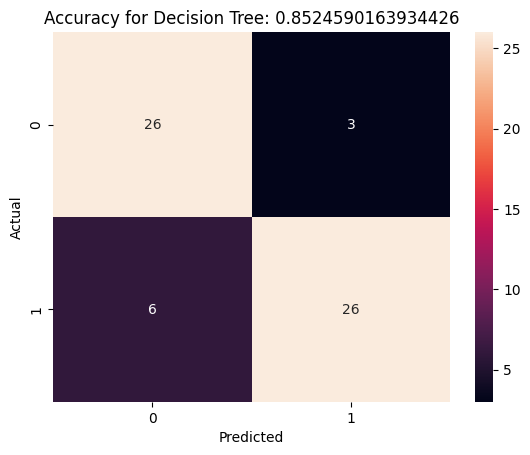

In [100]:
# confusion matrix heatmap for decision tree

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')

plt.title(f'Accuracy for Decision Tree: {accuracy_score(y_test, y_pred)}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [102]:
# Calculation of average error and accuracy for decision tree

from sklearn.metrics import f1_score, mean_squared_error, mean_absolute_error, log_loss

print('Logistic Regression Model Accuracy Score:', accuracy_score(y_test, y_pred))
print('Logistic Regression Model F1 score: ', f1_score(y_test, y_pred))
print('Logistic Regression Model Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Logistic Regression Model Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Logistic Regression Model log loss: ', log_loss(y_test, y_pred))

Logistic Regression Model Accuracy Score: 0.8524590163934426
Logistic Regression Model F1 score:  0.8524590163934426
Logistic Regression Model Mean Absolute Error:  0.14754098360655737
Logistic Regression Model Mean Squared Error:  0.14754098360655737
Logistic Regression Model log loss:  5.31791607380417


# Logistic Regression
### create the model

In [69]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(C=0.01 , solver='liblinear')
model_logistic

LogisticRegression(C=0.01, solver='liblinear')

In [70]:
# training the model with train data

model_logistic.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

# Model Evaluation For Logistic Regression

In [71]:
# test the model

y_pred_logistic = model_logistic.predict(X_test)

print(f"Real Values:\n{y_test[0:5]}")                      # real value
print()
print(f"Predict Values:\n{y_pred_logistic[0:5]}")          # predict value

Real Values:
179    0
228    0
111    1
246    0
60     1
Name: output, dtype: int64

Predict Values:
[0 1 1 0 1]


In [74]:
# accuracy logistic regression

print(f"Logistic Regression Accuracy: {accuracy_score(y_test , y_pred_logistic)}")

Logistic Regression Accuracy: 0.8852459016393442


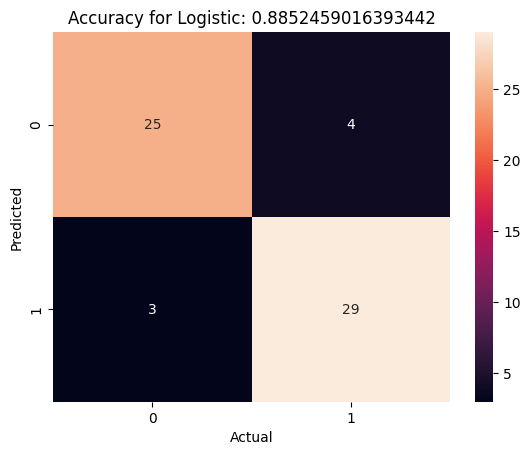

In [99]:
# confusion matrix heatmap for logistic regression

from sklearn.metrics import confusion_matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d')

plt.title(f'Accuracy for Logistic: {accuracy_score(y_test, y_pred_logistic)}')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [103]:
# Calculation of average error and accuracy for logistic regression

from sklearn.metrics import f1_score, mean_squared_error, mean_absolute_error, log_loss

print('Logistic Regression Model Accuracy Score:', accuracy_score(y_test, y_pred_logistic))
print('Logistic Regression Model F1 score: ', f1_score(y_test, y_pred_logistic))
print('Logistic Regression Model Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_logistic))
print('Logistic Regression Model Mean Squared Error: ', mean_squared_error(y_test, y_pred_logistic))
print('Logistic Regression Model log loss: ', log_loss(y_test, y_pred_logistic))

Logistic Regression Model Accuracy Score: 0.8852459016393442
Logistic Regression Model F1 score:  0.8923076923076924
Logistic Regression Model Mean Absolute Error:  0.11475409836065574
Logistic Regression Model Mean Squared Error:  0.11475409836065574
Logistic Regression Model log loss:  4.136156946292132


# K-Nearest Neighbors (KNN)
### create the model

In [88]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn

KNeighborsClassifier()

In [89]:
# training the model with train data

model_knn.fit(X_train, y_train)

KNeighborsClassifier()

# Model Evaluation For KNN

In [92]:
# test the KNN model

y_pred_knn = model_knn.predict(X_test)

print(y_pred_knn[0:5])        # predict value
print(y_test[0:5])            # real value


[0 0 1 0 1]
179    0
228    0
111    1
246    0
60     1
Name: output, dtype: int64


In [93]:
# accuracy KNN

print(f"KNN Accuracy: {accuracy_score(y_test , y_pred_knn)}")

KNN Accuracy: 0.9016393442622951


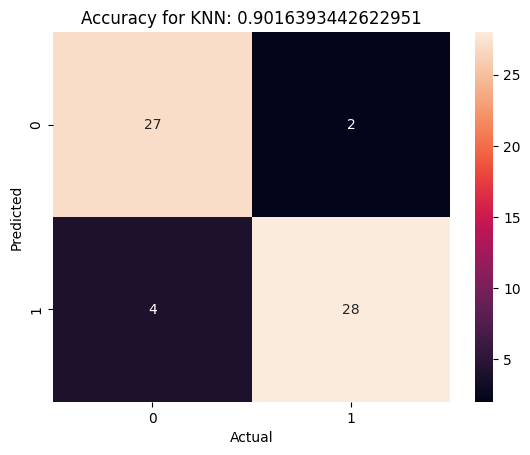

In [110]:
# confusion matrix heatmap for KNN

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')

plt.title(f'Accuracy for KNN: {accuracy_score(y_test, y_pred_knn)}')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [104]:
# Calculation of average error and accuracy for KNN

print('Logistic Regression Model Accuracy Score:', accuracy_score(y_test, y_pred_knn))
print('Logistic Regression Model F1 score: ', f1_score(y_test, y_pred_knn))
print('Logistic Regression Model Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_knn))
print('Logistic Regression Model Mean Squared Error: ', mean_squared_error(y_test, y_pred_knn))
print('Logistic Regression Model log loss: ', log_loss(y_test, y_pred_knn))

Logistic Regression Model Accuracy Score: 0.9016393442622951
Logistic Regression Model F1 score:  0.9032258064516129
Logistic Regression Model Mean Absolute Error:  0.09836065573770492
Logistic Regression Model Mean Squared Error:  0.09836065573770492
Logistic Regression Model log loss:  3.545277382536113


# Support Vector Machine (SVM)
### create the model

In [105]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm

SVC()

In [106]:
# training the model with train data

model_svm.fit(X_train, y_train)

SVC()

# Model Evaluation For SVM

In [107]:
# test the SVM model

y_pred_svm = model_svm.predict(X_test)

print(y_pred_knn[0:5])        # predict value
print(y_test[0:5])            # real value

[0 0 1 0 1]
179    0
228    0
111    1
246    0
60     1
Name: output, dtype: int64


In [108]:
# accuracy SVM

print(f"SVM Accuracy: {accuracy_score(y_test , y_pred_svm)}")

SVM Accuracy: 0.8852459016393442


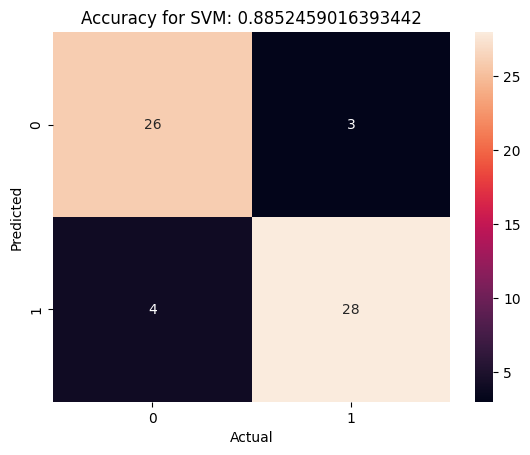

In [109]:
# confusion matrix heatmap for SVM

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d')

plt.title(f'Accuracy for SVM: {accuracy_score(y_test, y_pred_svm)}')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [111]:
# Calculation of average error and accuracy for SVM

print('Logistic Regression Model Accuracy Score:', accuracy_score(y_test, y_pred_svm))
print('Logistic Regression Model F1 score: ', f1_score(y_test, y_pred_svm))
print('Logistic Regression Model Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_svm))
print('Logistic Regression Model Mean Squared Error: ', mean_squared_error(y_test, y_pred_svm))
print('Logistic Regression Model log loss: ', log_loss(y_test, y_pred_svm))

Logistic Regression Model Accuracy Score: 0.8852459016393442
Logistic Regression Model F1 score:  0.8888888888888888
Logistic Regression Model Mean Absolute Error:  0.11475409836065574
Logistic Regression Model Mean Squared Error:  0.11475409836065574
Logistic Regression Model log loss:  4.136156946292132


## Model Comparison

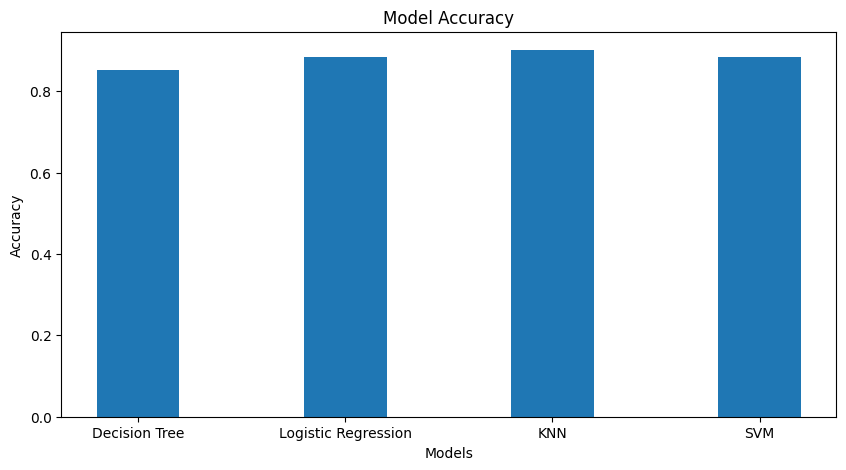

In [114]:
models = ['Decision Tree', 'Logistic Regression', 'KNN', 'SVM']

accuracy = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm)]

plt.figure(figsize=(10,5))
plt.bar(models, accuracy, width = 0.4)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()